![](scipy.png)

# Introduction
***

## SciPy

SciPy is a Python library used to solve scientific and mathematical problems. SciPy is built upon numpy and so can make use of Numpy keyword like help() & info(). Allows for manipulation and visualization of data with a wide range of easy to use commands

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab.

The additional benefit of basing SciPy on Python is that this also makes a powerful programming language available for use in developing sophisticated programs and specialized applications. Scientific applications using SciPy benefit from the development of additional modules in numerous niches of the software landscape by developers across the world. Everything from parallel programming to web and data-base subroutines and classes have been made available to the Python programmer. All of this power is available in addition to the mathematical libraries in SciPy.

To use SciPy, you must also import numpy, scipy, and matplotlib.

## SciPy.Stats

SciPy.Stats is a module of SciPy containing a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

Statistics is a very large area, and there are topics that are out of scope for SciPy and are covered by other packages. Some of the most important ones are:

statsmodels: regression, linear models, time series analysis, extensions to topics also covered by scipy.stats.

Pandas: tabular data, time series functionality, interfaces to other statistical languages.

PyMC3: Bayesian statistical modeling, probabilistic machine learning.

scikit-learn: classification, regression, model selection.

Seaborn: statistical data visualization.

rpy2: Python to R bridge.

[1][2]

In [12]:
import matplotlib.pyplot as plt

import numpy as np

#plot size
plt.rcParams["figure.figsize"] = (12,8)

# plot style
plt.style.use("ggplot")

In [9]:
# set the seed of the rng. To generate suedo random number set the seed to 1
seed = 1 

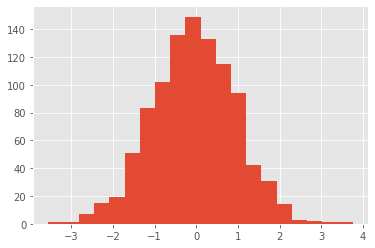

In [22]:
# create a random number generator
rng = np.random.default_rng(seed=seed)
normal = rng.standard_normal(1000)
plt.hist(normal,bins =20);
# ';' means the array isnt dispalyed 

# Reference 
***

[1] https://scipy.github.io/devdocs/tutorial/general.html

[2] https://docs.scipy.org/doc/scipy/reference/stats.html